#**EVALUATION METRICS AND REGRESSION IMPLEMENTATION**

##**Theoretical questions:**





**1. What does R-squared represent in a regression model?**

R² (coefficient of determination) shows how much of the variance in the dependent variable is explained by the independent variables.

* **R² = 0.90** means 90% of the variation in Y is explained by X.

---

**2. What are the assumptions of linear regression?**

* **Linearity**
* **No multicollinearity**
* **Homoscedasticity** (constant variance of errors)
* **Independence of residuals**
* **Normally distributed residuals**

---

**3. What is the difference between R-squared and Adjusted R-squared?**

* **R²** increases with more variables, even if they’re irrelevant.
* **Adjusted R²** penalizes for adding unnecessary predictors and adjusts based on the number of predictors.

---

**4. Why do we use Mean Squared Error (MSE)?**

MSE measures the average squared difference between actual and predicted values. It penalizes **larger errors more**.

---

**5. What does an Adjusted R-squared value of 0.85 indicate?**

85% of the variation in the dependent variable is explained by the model, **adjusting for the number of predictors**. A strong model.

---

**6. How do we check for normality of residuals in linear regression?**

* **Histogram** of residuals
* **Q-Q plot**
* **Shapiro-Wilk test** or **Kolmogorov-Smirnov test**

---

**7. What is multicollinearity, and how does it impact regression?**

Multicollinearity occurs when predictors are highly correlated.
It leads to:

* Unstable coefficient estimates
* Inflated standard errors
* Misleading p-values

---

**8. What is Mean Absolute Error (MAE)?**

MAE is the average of the **absolute differences** between predicted and actual values. Less sensitive to outliers than MSE.

---


**9. What are the benefits of using an ML pipeline?**

* **Organized workflow**
* **Reusability & consistency**
* **Automation of preprocessing, training, and prediction**
* **Easy cross-validation**

---

**10. Why is RMSE considered more interpretable than MSE?**

RMSE has the **same unit as the target variable**, making it easier to interpret than MSE, which is in squared units.

---

**11. What is pickling in Python, and how is it useful in ML?**

Pickling is the process of **serializing Python objects**.
In ML, it allows saving trained models for reuse without retraining.

---

**12. What does a high R-squared value mean?**

It indicates a strong linear relationship between independent and dependent variables. However, it doesn’t imply **causation or accuracy**.

---

**13. What happens if linear regression assumptions are violated?**

* Biased or inefficient estimates
* Invalid p-values and confidence intervals
* Reduced model reliability and prediction accuracy

---

**14. How can we address multicollinearity in regression?**

* Remove or combine correlated variables
* Use **Ridge** or **Lasso** regularization
* Apply **PCA (Principal Component Analysis)**

---


**15. How can feature selection improve model performance in regression analysis?**

* Reduces overfitting
* Improves interpretability
* Enhances accuracy and training speed

---

**16. How is Adjusted R-squared calculated?**

$$
Adjusted\ R^2 = 1 - \left(\frac{(1 - R^2)(n - 1)}{n - p - 1}\right)
$$

Where `n` = observations, `p` = predictors.

---

**17. Why is MSE sensitive to outliers?**

Because it **squares errors**, large errors have disproportionately large impacts.

---

**18. What is the role of homoscedasticity in linear regression?**

It ensures that residuals have constant variance across all levels of predictors, which is essential for **unbiased and efficient** estimates.

---

**19. What is Root Mean Squared Error (RMSE)?**

$$
RMSE = \sqrt{\frac{1}{n} \sum (Y_{true} - Y_{pred})^2}
$$

It’s a widely used measure of model prediction error in the **original units** of the target variable.

---


**20. Why is pickling considered risky?**

Pickled files can execute arbitrary code during loading — so **don’t load untrusted pickle files**. It’s a potential **security risk**.

---

**21. What alternatives exist to pickling for saving ML models?**

* **Joblib** (more efficient for NumPy arrays)
* **ONNX** (cross-platform format)
* **PMML** (predictive model markup language)
* **HDF5** (for Keras models)
* **Cloud ML model registries** (like MLflow, TensorFlow SavedModel, etc.)

---

**22. What is heteroscedasticity, and why is it a problem?**

It means **non-constant error variance**. It violates regression assumptions and leads to inefficient and biased statistical inference.

---

**23. How can interaction terms enhance a regression model's predictive power?**

They capture **combined effects** of two or more predictors that wouldn’t be visible individually.
E.g., the effect of education on income might depend on experience.


##**Practical questions:**



###**1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model using Seaborn's "diamonds" dataset.**



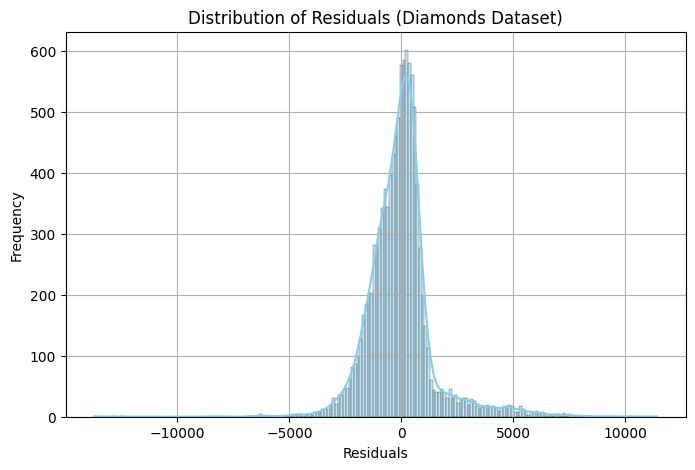

In [27]:
!pip install seaborn --quiet

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

diamonds = sns.load_dataset("diamonds").dropna()

X = diamonds[['carat', 'depth', 'table']]
y = diamonds['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='skyblue')
plt.title("Distribution of Residuals (Diamonds Dataset)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



###**2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model.**

In [28]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

diamonds = sns.load_dataset("diamonds").dropna()

X = diamonds[['carat', 'depth', 'table']]
y = diamonds['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Squared Error (MSE): 2333883.18
Mean Absolute Error (MAE): 994.74
Root Mean Squared Error (RMSE): 1527.71


###**3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity.**

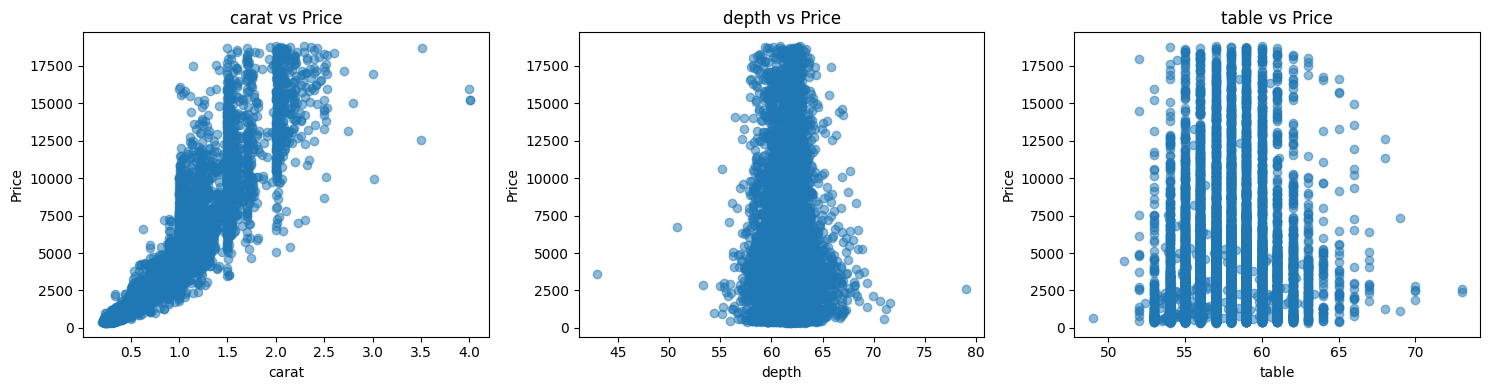

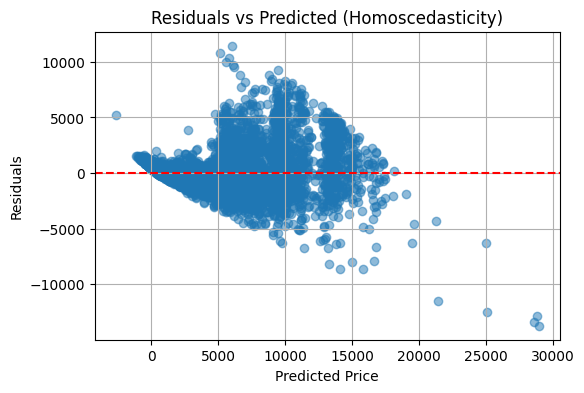

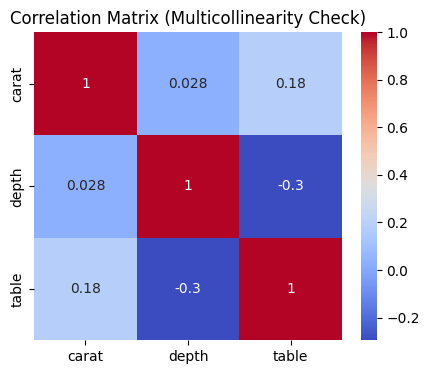

In [29]:

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
diamonds = sns.load_dataset("diamonds").dropna()
X = diamonds[['carat', 'depth', 'table']]
y = diamonds['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
residuals = y_test - y_pred
plt.figure(figsize=(15, 4))
for i, feature in enumerate(X.columns):
    plt.subplot(1, 3, i+1)
    plt.scatter(X_test[feature], y_test, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel("Price")
    plt.title(f"{feature} vs Price")
plt.tight_layout()
plt.show()
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Price")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Homoscedasticity)")
plt.grid(True)
plt.show()

plt.figure(figsize=(5, 4))
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", square=True)
plt.title("Correlation Matrix (Multicollinearity Check)")
plt.show()



###**4. Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models**

In [30]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

diamonds = sns.load_dataset("diamonds").dropna()

X = diamonds[['carat', 'depth', 'table']]
y = diamonds['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"{name}")
    print(f"  R² Score: {r2:.4f}")
    print(f"  RMSE: {rmse:.2f}")
    print("-" * 40)



Linear Regression
  R² Score: 0.8532
  RMSE: 1527.71
----------------------------------------
Ridge Regression
  R² Score: 0.8532
  RMSE: 1527.70
----------------------------------------
Lasso Regression
  R² Score: 0.8532
  RMSE: 1527.70
----------------------------------------


#**5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score.**

In [31]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

tips = sns.load_dataset("tips")

X = tips[['total_bill']]
y = tips['tip']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

print(f"Coefficient (slope): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R-squared Score: {model.score(X_test, y_test):.4f}")



Coefficient (slope): 0.1070
Intercept: 0.9252
R-squared Score: 0.5449


#**6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualizes the results.**

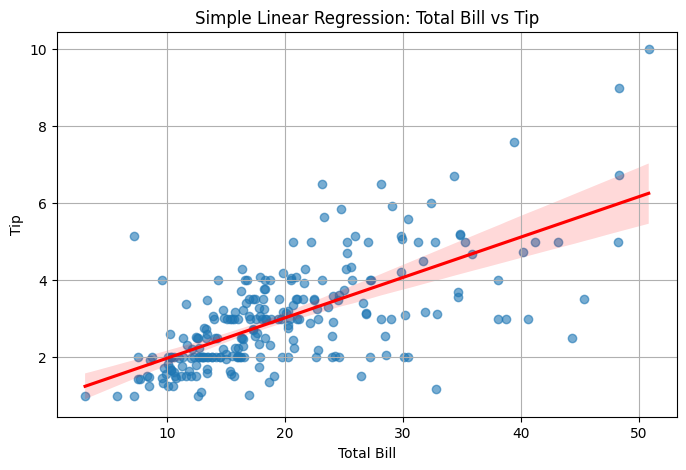

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

tips = sns.load_dataset("tips")

X = tips[['total_bill']]
y = tips['tip']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

plt.figure(figsize=(8, 5))
sns.regplot(x='total_bill', y='tip', data=tips, scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.title("Simple Linear Regression: Total Bill vs Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.grid(True)
plt.show()



#**7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line.**

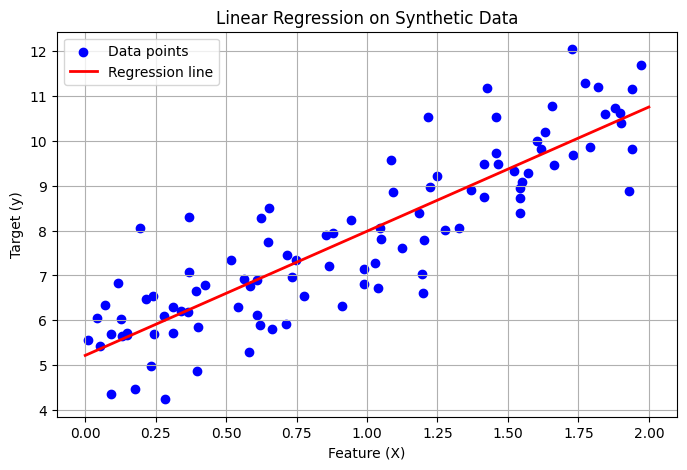

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 5 + 3 * X + np.random.randn(100, 1)

model = LinearRegression()
model.fit(X, y)

X_new = np.linspace(0, 2, 100).reshape(-1, 1)
y_pred = model.predict(X_new)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_new, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel("Feature (X)")
plt.ylabel("Target (y)")
plt.title("Linear Regression on Synthetic Data")
plt.legend()
plt.grid(True)
plt.show()



#**8. Write a Python script that pickles a trained linear regression model and saves it to a file.**

In [34]:
import numpy as np
import pickle
from sklearn.linear_model import LinearRegression

np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
model = LinearRegression()
model.fit(X, y)

with open("linear_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model has been pickled and saved as 'linear_model.pkl'")


Model has been pickled and saved as 'linear_model.pkl'


#**9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve.**

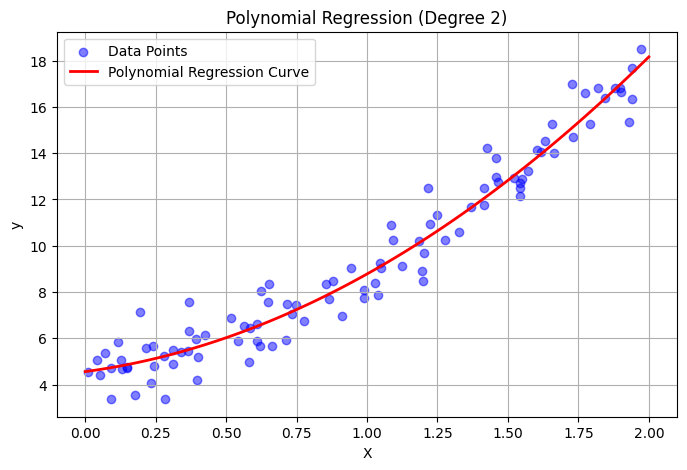

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + 2 * X**2 + np.random.randn(100, 1)

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

X_plot = np.linspace(0, 2, 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot = model.predict(X_plot_poly)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data Points')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Polynomial Regression Curve')
plt.title("Polynomial Regression (Degree 2)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

#**10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model's coefficient and intercept.**

In [36]:

import numpy as np
from sklearn.linear_model import LinearRegression

np.random.seed(1)
X = 3 * np.random.rand(100, 1)
y = 7 + 2.5 * X + np.random.randn(100, 1)

model = LinearRegression()
model.fit(X, y)
print(f"Coefficient (slope): {model.coef_[0][0]:.4f}")
print(f"Intercept: {model.intercept_[0]:.4f}")


Coefficient (slope): 2.3950
Intercept: 7.2370


#**11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and compares their performance.**

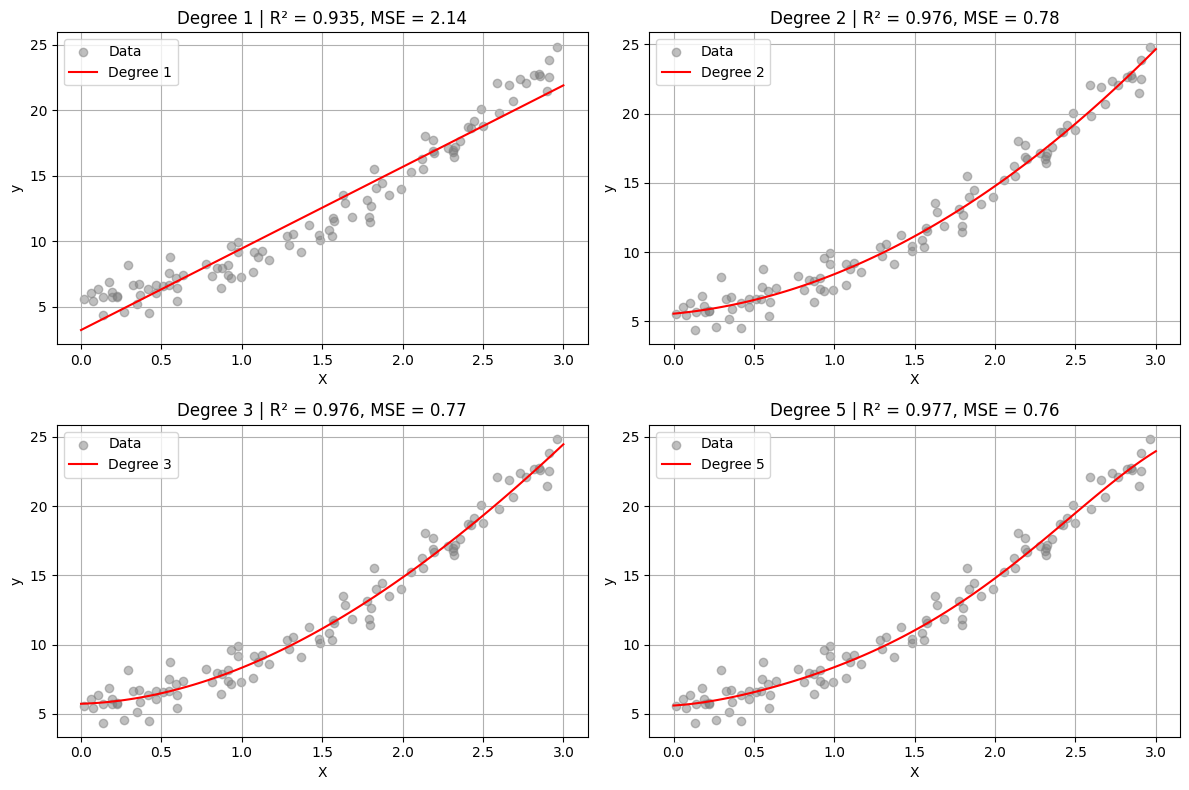

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

np.random.seed(42)
X = 3 * np.random.rand(100, 1)
y = 5 + 2 * X + 1.5 * X**2 + np.random.randn(100, 1)

degrees = [1, 2, 3, 5]

plt.figure(figsize=(12, 8))
X_plot = np.linspace(0, 3, 100).reshape(-1, 1)

for i, degree in enumerate(degrees):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_poly = poly.fit_transform(X)
    X_plot_poly = poly.transform(X_plot)

    model = LinearRegression()
    model.fit(X_poly, y)

    y_pred = model.predict(X_poly)
    y_plot = model.predict(X_plot_poly)
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    plt.subplot(2, 2, i+1)
    plt.scatter(X, y, color='gray', alpha=0.5, label='Data')
    plt.plot(X_plot, y_plot, label=f'Degree {degree}', color='red')
    plt.title(f"Degree {degree} | R² = {r2:.3f}, MSE = {mse:.2f}")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()

#**12. Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score.**

In [38]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

diamonds = sns.load_dataset("diamonds").dropna()

X = diamonds[['carat', 'depth']]
y = diamonds['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")
print(f"R-squared Score: {model.score(X_test, y_test):.4f}")


Coefficients: [7778.74124426  -99.77691694]
Intercept: 3890.771743834406
R-squared Score: 0.8506


#**13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points.**

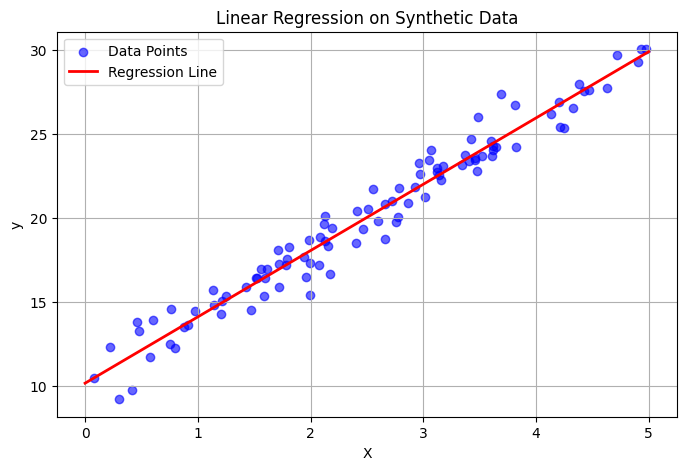

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(123)
X = 5 * np.random.rand(100, 1)
y = 10 + 4 * X + np.random.randn(100, 1)

model = LinearRegression()
model.fit(X, y)

X_line = np.linspace(0, 5, 100).reshape(-1, 1)
y_line = model.predict(X_line)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.6, label='Data Points')
plt.plot(X_line, y_line, color='red', linewidth=2, label='Regression Line')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression on Synthetic Data")
plt.legend()
plt.grid(True)
plt.show()


#**14. Write a Python script that uses the Variance Inflation Factor (vi) to check for multicollinearity in a dataset with multiple features**

In [40]:
!pip install statsmodels --quiet

import seaborn as sns
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

diamonds = sns.load_dataset("diamonds").dropna()
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print("Variance Inflation Factor (VIF) for each feature:")
print(vif_data)


Variance Inflation Factor (VIF) for each feature:
  Feature        VIF
0   carat  21.602712
1   depth   1.496590
2   table   1.143225
3       x  56.187704
4       y  20.454295
5       z  23.530049


#**15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits o polynomiot regression model, and plots the regression curve**

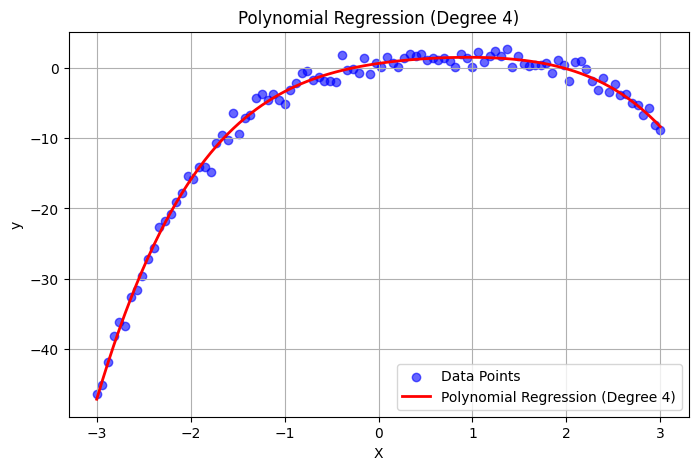

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 1 + 2*X - 1.5*X**2 + 0.5*X**3 - 0.2*X**4 + np.random.randn(100, 1)

poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_plot = model.predict(X_plot_poly)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.6, label='Data Points')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Polynomial Regression (Degree 4)')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Polynomial Regression (Degree 4)")
plt.legend()
plt.grid(True)
plt.show()


#**16. Write a Python script that creates a machine leaming pipeline with data standardization and a multiple linear regression model, and prints the R-squared score**

In [42]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

diamonds = sns.load_dataset("diamonds").dropna()

X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)
r2_score = pipeline.score(X_test, y_test)

print(f"R-squared Score: {r2_score:.4f}")


R-squared Score: 0.8590


#**17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve**

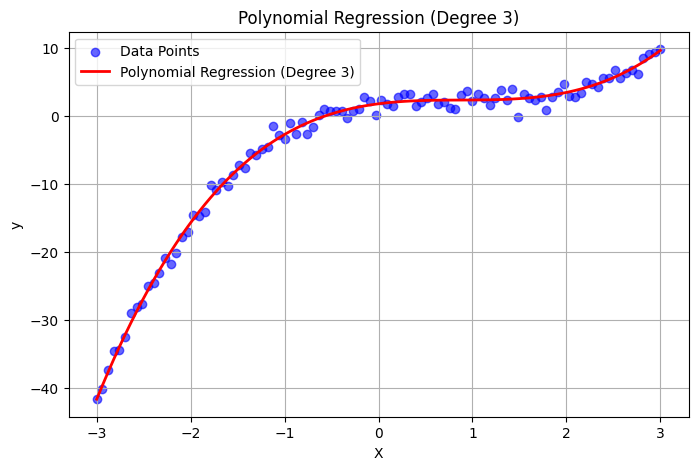

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(42)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 2 + 1.5*X - 2*X**2 + 0.8*X**3 + np.random.randn(100, 1)

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
X_plot_poly = poly.transform(X_plot)
y_plot = model.predict(X_plot_poly)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.6, label='Data Points')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Polynomial Regression (Degree 3)')
plt.title("Polynomial Regression (Degree 3)")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


#**18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print the-squared score and model coefficients.**

In [44]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = np.random.rand(100, 5)
true_coefs = np.array([3, -2, 1.5, 0, 4])
y = X @ true_coefs + np.random.randn(100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(f"R-squared Score: {model.score(X_test, y_test):.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficients: {model.coef_}")

R-squared Score: 0.7555
Intercept: 0.1460
Coefficients: [ 2.65295867 -2.23392333  2.14790329  0.1455846   3.55435983]


#**19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the data points along with the regression line**

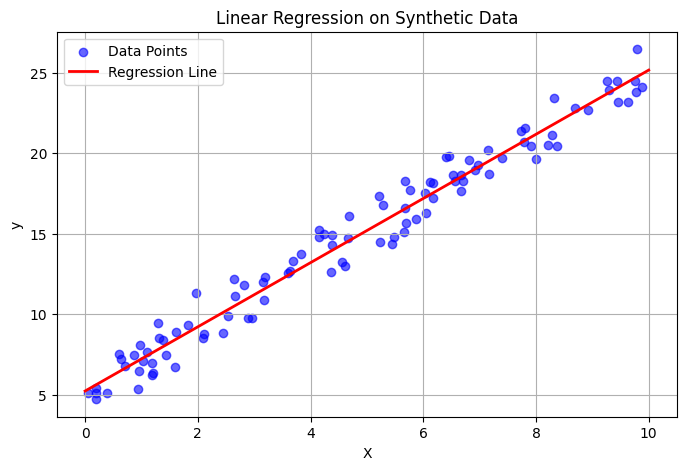

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(0)
X = 10 * np.random.rand(100, 1)
y = 5 + 2 * X + np.random.randn(100, 1)
model = LinearRegression()
model.fit(X, y)

X_plot = np.linspace(0, 10, 100).reshape(-1, 1)
y_pred = model.predict(X_plot)

plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', alpha=0.6, label='Data Points')
plt.plot(X_plot, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title("Linear Regression on Synthetic Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

#**20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the models R squared score and coefficients.**

In [46]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

np.random.seed(123)
X = np.random.rand(100, 3)
true_coeffs = np.array([2.5, -1.2, 3.0])
y = X @ true_coeffs + np.random.randn(100)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

print(f"R-squared Score: {model.score(X_test, y_test):.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficients: {model.coef_}")


R-squared Score: 0.4680
Intercept: -0.2778
Coefficients: [ 2.45718344 -0.5811207   2.90529446]


#**21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using jobilib instead of pickling**

In [47]:
!pip install joblib --quiet

import numpy as np
from sklearn.linear_model import LinearRegression
import joblib

np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

model = LinearRegression()
model.fit(X, y)

joblib.dump(model, 'linear_model_joblib.pkl')
print("Model saved as 'linear_model_joblib.pkl'")

loaded_model = joblib.load('linear_model_joblib.pkl')

X_new = np.array([[1.5]])
y_pred = loaded_model.predict(X_new)
print(f"Prediction for input [[1.5]]: {y_pred[0][0]:.4f}")


Model saved as 'linear_model_joblib.pkl'
Prediction for input [[1.5]]: 8.3703


#**22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seabom tips' dataset**

In [48]:
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

tips = sns.load_dataset("tips")

X = tips[['total_bill', 'sex', 'smoker', 'day', 'time']]
y = tips['tip']

categorical_features = ['sex', 'smoker', 'day', 'time']
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

pipeline = Pipeline([
    ('encoder', preprocessor),
    ('regressor', LinearRegression())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

print(f"R-squared Score: {pipeline.score(X_test, y_test):.4f}")


R-squared Score: 0.4774


#**23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and R-squared score.**

In [49]:
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split

np.random.seed(42)
X = np.random.rand(100, 5)
true_coefs = np.array([3, -2, 1.5, 0, 4])
y = X @ true_coefs + np.random.randn(100) * 0.5


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

print("Linear Regression:")
print(f"  Coefficients: {lin_model.coef_}")
print(f"  R² Score: {lin_model.score(X_test, y_test):.4f}")

print("\nRidge Regression:")
print(f"  Coefficients: {ridge_model.coef_}")
print(f"  R² Score: {ridge_model.score(X_test, y_test):.4f}")

Linear Regression:
  Coefficients: [ 2.82647934 -2.11696166  1.82395165  0.0727923   3.77717992]
  R² Score: 0.9202

Ridge Regression:
  Coefficients: [ 2.42144015 -1.91157318  1.52310521  0.16596803  3.31906188]
  R² Score: 0.8940


#**24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset**

In [50]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

model = LinearRegression()

r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Cross-Validation R² Scores:", r2_scores)
print(f"Average R² Score: {np.mean(r2_scores):.4f}")

Cross-Validation R² Scores: [0.99336803 0.99000491 0.99770889 0.9913085  0.99330699]
Average R² Score: 0.9931


#**25. Write a Python script that compares polynomial regression models of different degrees and prints the R-squared score for each.**

In [51]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

np.random.seed(0)
X = np.linspace(-3, 3, 100).reshape(-1, 1)
y = 1 + 2*X - 1.5*X**2 + 0.5*X**3 + np.random.randn(100, 1).ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Polynomial Regression R² Scores by Degree:")
for degree in range(1, 6):
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    y_pred = model.predict(X_test_poly)
    r2 = r2_score(y_test, y_pred)

    print(f"  Degree {degree}: R² Score = {r2:.4f}")

Polynomial Regression R² Scores by Degree:
  Degree 1: R² Score = 0.7402
  Degree 2: R² Score = 0.9498
  Degree 3: R² Score = 1.0000
  Degree 4: R² Score = 1.0000
  Degree 5: R² Score = 1.0000
